In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import joblib

In [6]:
df = pd.read_csv('incomeData.csv')

In [7]:
df

,nan,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


##### Check Datatypes in the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nan             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


##### Summary of the dataset

In [11]:
df.describe()

,nan,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.rename(columns = {'nan':'age'},inplace = True)

In [13]:
df.duplicated().sum()

24

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df = df[(df['workclass'] !=' ?') & (df['occupation'] != ' ?')]

In [18]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [19]:
df.to_csv("Income Data.csv")

In [20]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [21]:
numerical_feature

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [22]:
categorical_feature

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'Income']

IncomeVista Visionary
A Machine Learning Approach
A broad and insightful view of income, using innovative methods for Income Prediction.
The dataset contains the income result of certain groups of people who's having the features mentioned below

#### Categorical Features

workclass: It denotes the working class of the person.
values: Private, Self-emp-not-inc,Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education: It denotes the educational qualification of the person.
values: Bachelors, Somecollege, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,10th, Doctorate, 5th-6th, Preschool.

marital-status: It denotes the marital status of the person.
values: Married-civ-spouse(civillian spouse),Divorced, Never-married, Separated, Widowed, Married-spouse-absent,Married-AF-spouse(Armed force spouse).

occupation: It denotes the occupation of a person.
values: Tech-support, Craft-repair,Otherservice, Sales, Exec-managerial, Prof-specialty,Handlers-cleaners, Machine-op-inspct,Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,Protective-serv, Armed-Forces.

relationship: It denotes the people present in the family.
values: Wife, Own-child, Husband,Not-in-family, Other-relative, Unmarried.

race: It denotes the person’s origins.
values: White, Asian-Pac-Islander, Amer-IndianEskimo,Other, Black.

sex: It denotes the person's gender.
values: Female, Male.

native-country: It denotes the country to which the person belongs.

#### Numerical Features

capital-gain: continuous. It denotes the monitory gains by the person.

capital-loss: continuous. It denotes the monitory loss by the person.

hours-per-week: continuous. It denotes the number of working hours per week by the person.

age: continuous. It denotes the age of the person.

fnlwgt: Final-weight,a statistical weight assigned to each individual in the dataset to make the sample more representative of the entire population from which it was drawn.

education-num: It denotes the quantitative values with reference to education.

In [24]:
for i in df.columns:
    print(f"{i}\n-----------------------\n{df[i].unique()}")

age
-----------------------
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]
workclass
-----------------------
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
fnlwgt
-----------------------
[ 77516  83311 215646 ...  84661 257302 201490]
education
-----------------------
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
education-num
-----------------------
[13  9  7 14  5 10 12 11  4 16 15  3  6  1  8  2]
marital-status
-----------------------
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
-----------------------
[' Adm-clerical' ' Exec-ma

In [25]:
df = df[df['native-country'] !=' ?']

### Univariate analysis

#### Numerical Feature

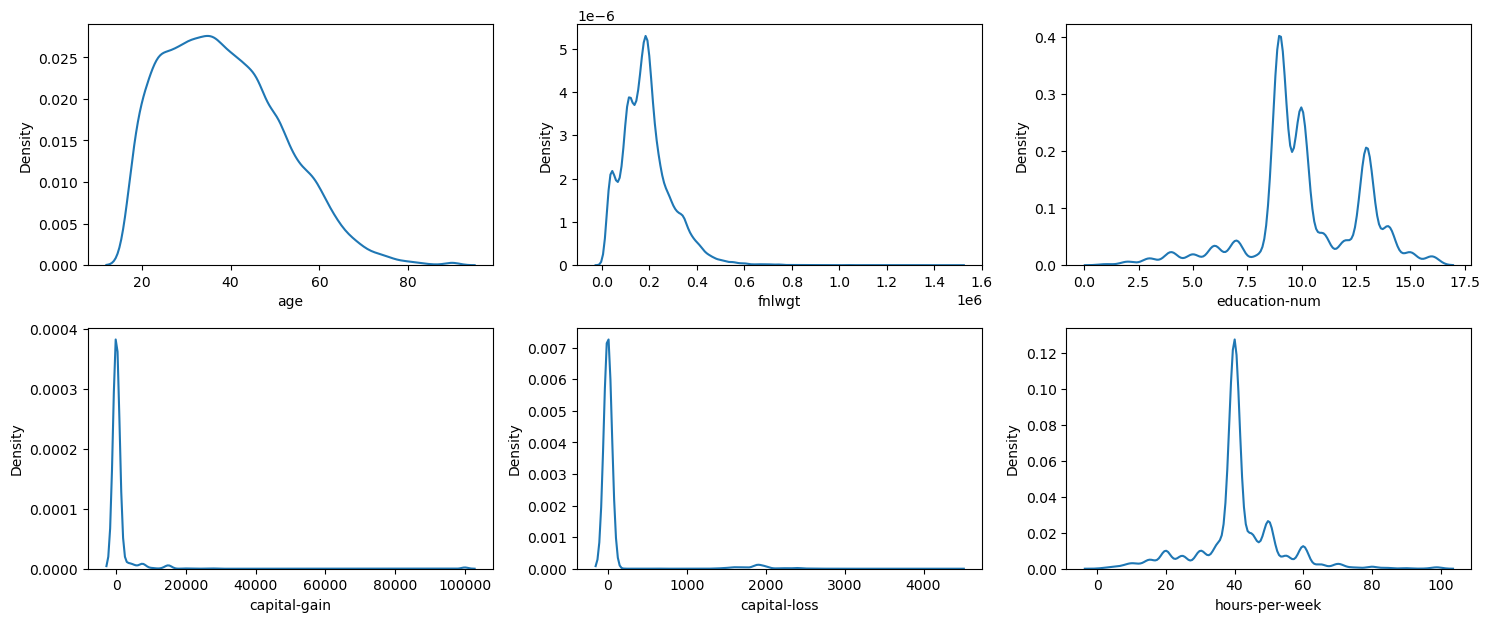

In [28]:
plt.figure(figsize = (15,15))
for i in range(0,len(numerical_feature)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x = df[numerical_feature[i]])
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

In [29]:
for i in categorical_feature:
    print(i)

workclass
education
marital-status
occupation
relationship
race
sex
native-country
Income


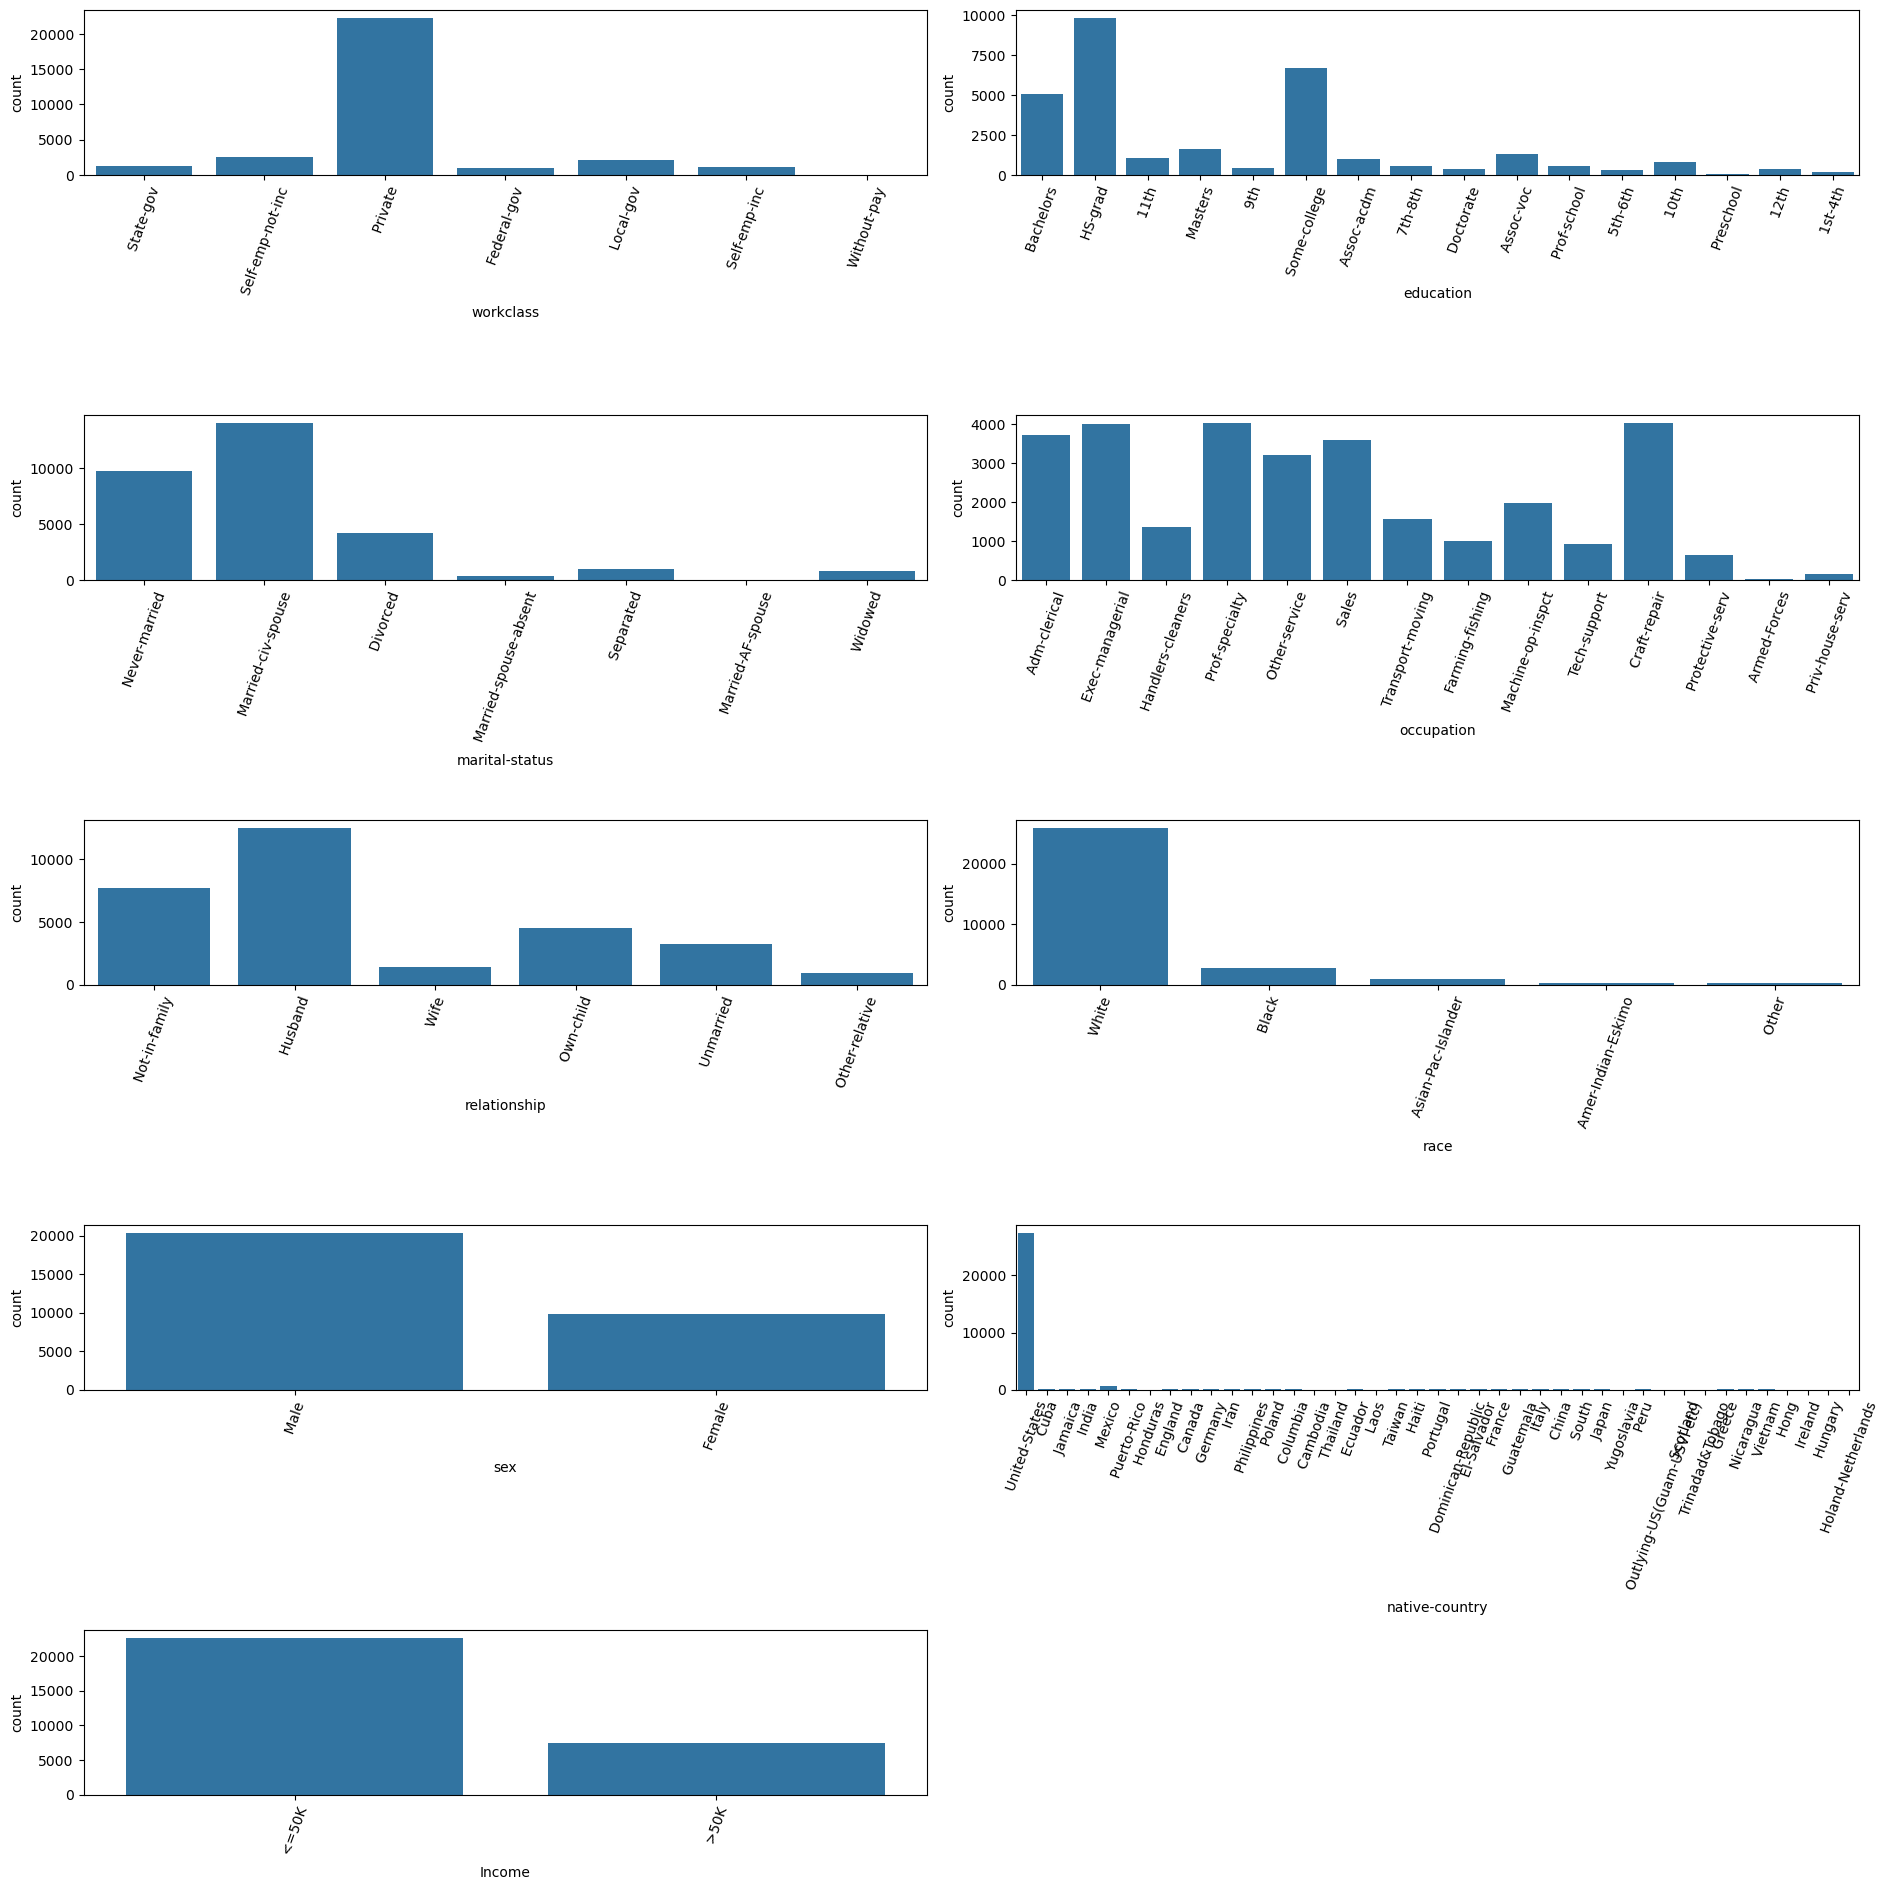

In [30]:
plt.figure(figsize=(19,19))
for i in range(0,len(categorical_feature)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = df[categorical_feature[i]])
    plt.xticks(rotation = 70)
    plt.tight_layout()

## Visualization

In [32]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [33]:
df.occupation.value_counts()

occupation
Prof-specialty       4034
Craft-repair         4025
Exec-managerial      3991
Adm-clerical         3719
Sales                3584
Other-service        3209
Machine-op-inspct    1964
Transport-moving     1572
Handlers-cleaners    1349
Farming-fishing       987
Tech-support          911
Protective-serv       644
Priv-house-serv       141
Armed-Forces            9
Name: count, dtype: int64

In [34]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


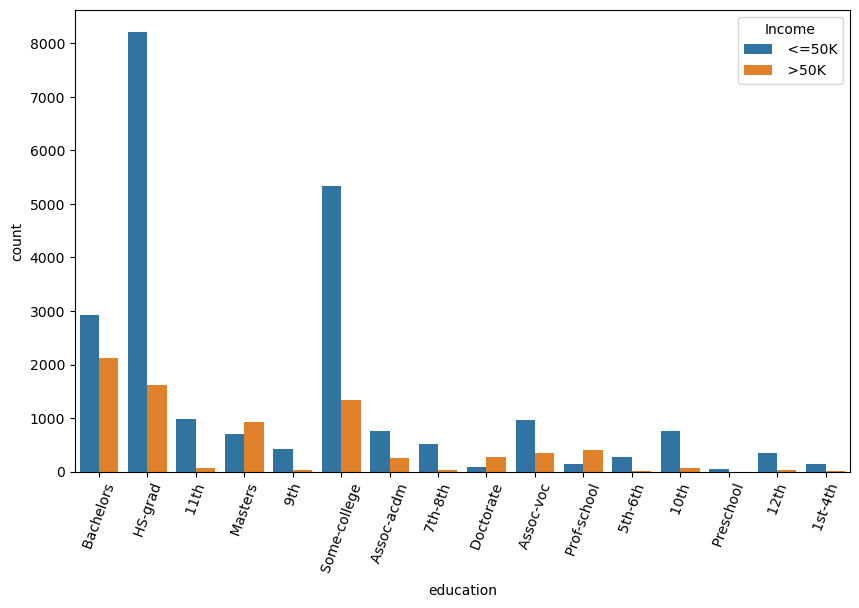

In [35]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'education',hue = 'Income',data = df)
plt.xticks(rotation = 70)
plt.show()

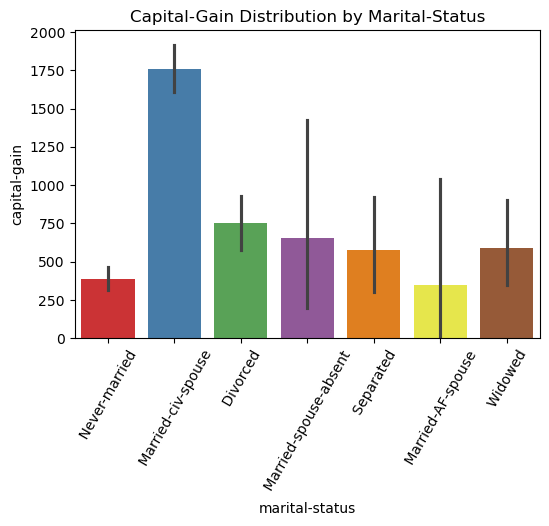

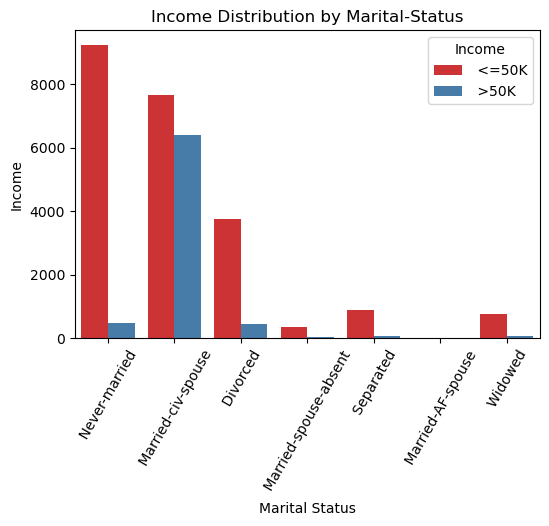

In [36]:
plt.figure(figsize = (6,4))
sns.barplot(x = 'marital-status',y = 'capital-gain',data = df,palette = "Set1")
plt.title("Capital-Gain Distribution by Marital-Status")
plt.xticks(rotation = 60)


plt.figure(figsize = (6,4))
sns.countplot(x = 'marital-status',hue = 'Income',data = df,palette="Set1")
plt.title('Income Distribution by Marital-Status')
plt.xticks(rotation = 60)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.show()

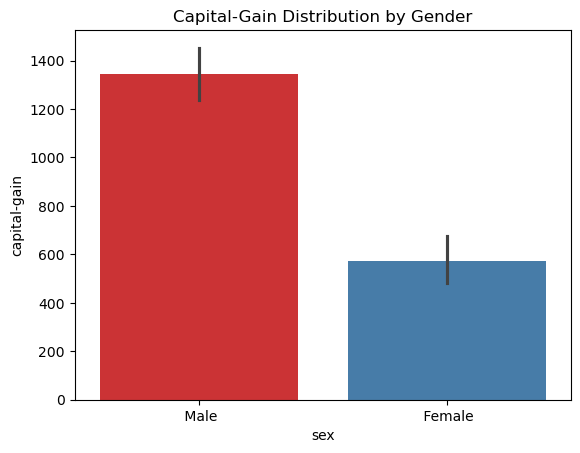

In [37]:
sns.barplot(x = 'sex',y = 'capital-gain',data = df,palette='Set1')
plt.title('Capital-Gain Distribution by Gender')
plt.show()

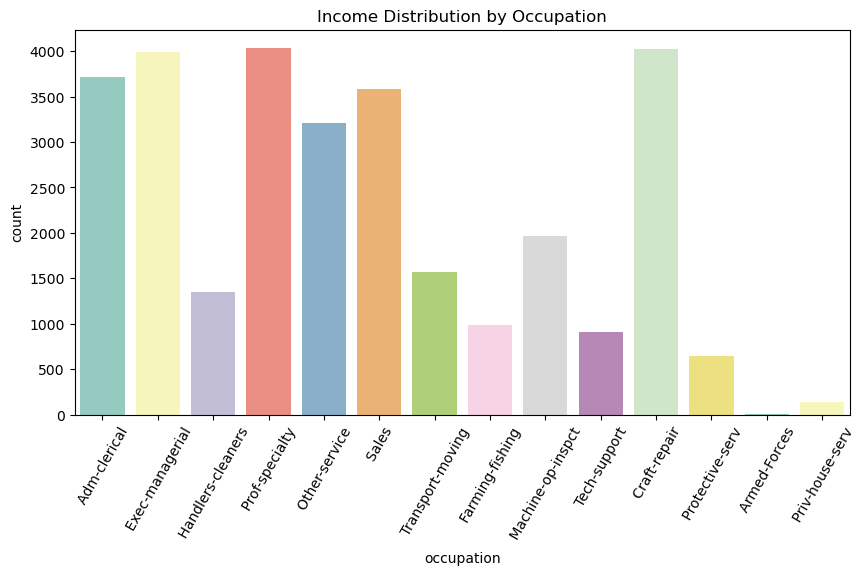

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'occupation',data = df ,palette='Set3')
plt.xticks(rotation = 60)
plt.title('Income Distribution by Occupation')
plt.show()

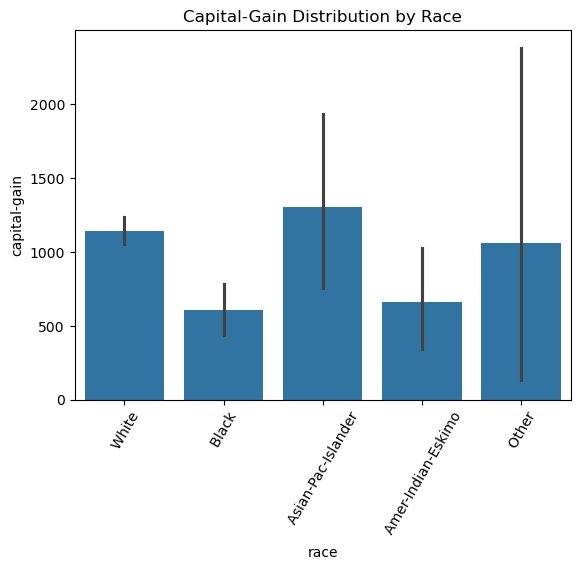

In [39]:
sns.barplot(x = 'race',y = 'capital-gain',data = df)
plt.xticks(rotation = 60)
plt.title('Capital-Gain Distribution by Race')
plt.show()

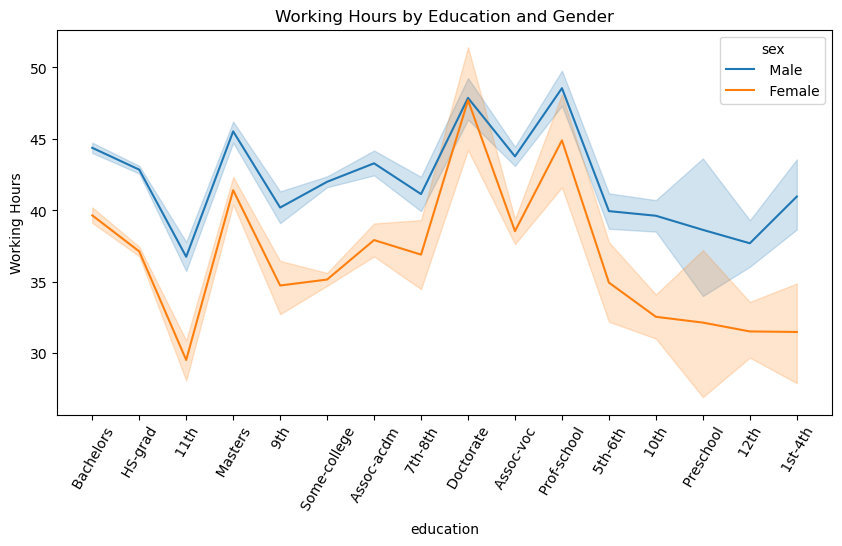

In [40]:
plt.figure(figsize = (10,5))
sns.lineplot(x = 'education',y = 'hours-per-week',data = df,hue = 'sex')
plt.title('Working Hours by Education and Gender')
plt.xticks(rotation = 60)
plt.ylabel('Working Hours')
plt.show()

In [41]:
df.drop(['fnlwgt'],axis = 1,inplace = True)

In [42]:
from scipy.stats import chi2_contingency
chi_test = []
for i in categorical_feature:
    if chi2_contingency(pd.crosstab(df['Income'],df[i]))[1] < .05:
        chi_test.append('Reject')
    else:
        chi_test.append('Accept')
result = pd.DataFrame(data = [categorical_feature, chi_test]).T
result.columns = ['Column','Hyppthesis Result']

In [43]:
result

,Column,Hyppthesis Result
0,workclass,Reject
1,education,Reject
2,marital-status,Reject
3,occupation,Reject
4,relationship,Reject
5,race,Reject
6,sex,Reject
7,native-country,Reject
8,Income,Reject


In [44]:
df.corr(numeric_only=True)

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.043203,0.080162,0.060141,0.101348
education-num,0.043203,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,0.152842,0.080429,0.052380,1.000000


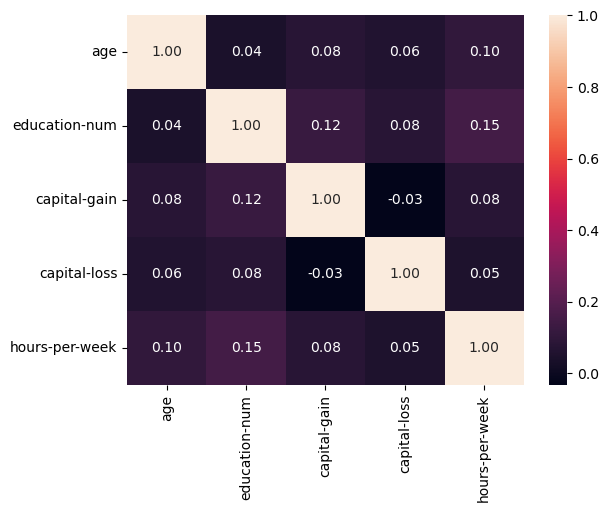

In [45]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt = '.2f')
plt.show()

In [46]:
df.corr(numeric_only=True)

,age,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.043203,0.080162,0.060141,0.101348
education-num,0.043203,1.000000,0.124455,0.079613,0.152842
capital-gain,0.080162,0.124455,1.000000,-0.032255,0.080429
capital-loss,0.060141,0.079613,-0.032255,1.000000,0.052380
hours-per-week,0.101348,0.152842,0.080429,0.052380,1.000000


In [47]:
df.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [48]:
df['Income'] = df['Income'].apply(lambda x: 0 if x==' <=50K' else 1)

In [49]:
df.Income.unique()

array([0, 1], dtype=int64)

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
cate = df.select_dtypes(include = 'O').columns
cate

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [52]:
encoder = LabelEncoder()
df['workclass'] = encoder.fit_transform(df['workclass'])
joblib.dump(encoder,'Work_LabelEncoder.pkl')

['Work_LabelEncoder.pkl']

In [53]:
education_le = LabelEncoder()
df['education'] = education_le.fit_transform(df['education'])
joblib.dump(education_le,'Education_LabelEncoder.pkl')

['Education_LabelEncoder.pkl']

In [54]:
Marital_le = LabelEncoder()
df['marital-status'] = Marital_le.fit_transform(df['marital-status'])
joblib.dump(Marital_le,'Marital_LabeEncoder.pkl')

['Marital_LabeEncoder.pkl']

In [55]:
occupation_le = LabelEncoder()
df['occupation'] = occupation_le.fit_transform(df['occupation'])
joblib.dump(occupation_le,'Occupation_LabelEncoder.pkl')

['Occupation_LabelEncoder.pkl']

In [56]:
relationship_le = LabelEncoder()
df['relationship'] = relationship_le.fit_transform(df['relationship'])
joblib.dump(relationship_le,'Relationship_LabelEncoder.pkl')

['Relationship_LabelEncoder.pkl']

In [57]:
race_le = LabelEncoder()
df['race'] = race_le.fit_transform(df['race'])
joblib.dump(race_le,"Race_LabelEncoder.pkl")

['Race_LabelEncoder.pkl']

In [58]:
sex_le = LabelEncoder()
df['sex'] = sex_le.fit_transform(df['sex'])
joblib.dump(sex_le,'Sex_LabelEncoder.pkl')

['Sex_LabelEncoder.pkl']

In [59]:
country_le = LabelEncoder()
df['native-country'] = country_le.fit_transform(df['native-country'])
joblib.dump(country_le,"Country_LabelEncoder.pkl")

['Country_LabelEncoder.pkl']

In [60]:
df.corr()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
age,1.000000,0.080480,-0.001159,0.043203,-0.276227,-0.005662,-0.246482,0.023858,0.081827,0.080162,0.060141,0.101348,-0.002339,0.242017
workclass,0.080480,1.000000,0.017818,0.037772,-0.034169,0.015622,-0.067394,0.044740,0.074939,0.035339,0.007185,0.050697,0.007580,0.018030
education,-0.001159,0.017818,1.000000,0.345312,-0.040678,-0.038176,-0.012923,0.011334,-0.027967,0.030617,0.015075,0.060440,0.078176,0.079039
education-num,0.043203,0.037772,0.345312,1.000000,-0.063254,0.087702,-0.092227,0.033018,0.006049,0.124455,0.079613,0.152842,0.090642,0.335413
marital-status,-0.276227,-0.034169,-0.040678,-0.063254,1.000000,0.022529,0.178034,-0.068590,-0.119872,-0.042392,-0.035155,-0.188889,-0.025470,-0.193404
occupation,-0.005662,0.015622,-0.038176,0.087702,0.022529,1.000000,-0.053706,0.000735,0.062530,0.022151,0.014585,0.018428,-0.003380,0.051476
relationship,-0.246482,-0.067394,-0.012923,-0.092227,0.178034,-0.053706,1.000000,-0.117116,-0.585031,-0.058285,-0.063601,-0.257748,-0.010942,-0.251026
race,0.023858,0.044740,0.011334,0.033018,-0.068590,0.000735,-0.117116,1.000000,0.089429,0.014371,0.023545,0.048549,0.124839,0.071689
sex,0.081827,0.074939,-0.027967,0.006049,-0.119872,0.062530,-0.585031,0.089429,1.000000,0.048819,0.047008,0.231126,0.000284,0.216668
capital-gain,0.080162,0.035339,0.030617,0.124455,-0.042392,0.022151,-0.058285,0.014371,0.048819,1.000000,-0.032255,0.080429,0.008484,0.221204


In [61]:
x = df.drop(['Income','education-num'],axis = 1)
y = df['Income']

In [62]:
df.Income.value_counts()

Income
0    22633
1     7506
Name: count, dtype: int64

In [63]:
from imblearn.over_sampling import SMOTE

In [85]:
smote = SMOTE()

In [87]:
x_smote,y_smote = smote.fit_resample(x,df['Income'])
print('Orginal Dataset Shape',len(x))
print('Resample dataset shape',len(y_smote))

Orginal Dataset Shape 30139
Resample dataset shape 45266


In [89]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=.2,random_state=32)

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [95]:
pipeline = Pipeline([('StandardScaler',StandardScaler()),
                   ('LogisticRegression',LogisticRegression())
                    ])

In [97]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('StandardScaler', StandardScaler()),
                ('LogisticRegression', LogisticRegression())])

In [99]:
predict = pipeline.predict(x_test)
predict

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [101]:
y_test

43025    1
30442    1
14046    0
40356    1
43227    1
        ..
29889    1
14259    0
20880    0
1812     0
17547    1
Name: Income, Length: 9054, dtype: int64

In [103]:
from sklearn.metrics import accuracy_score

In [105]:
acc = accuracy_score(y_test,predict)
acc

0.7467417715926662

In [107]:
import joblib

In [109]:
joblib.dump(pipeline,'Pipeline.pkl')

['Pipeline.pkl']

In [111]:
residual = y_test-predict
residual

43025    0
30442    0
14046    0
40356    0
43227    0
        ..
29889    0
14259    0
20880    0
1812     0
17547    0
Name: Income, Length: 9054, dtype: int64

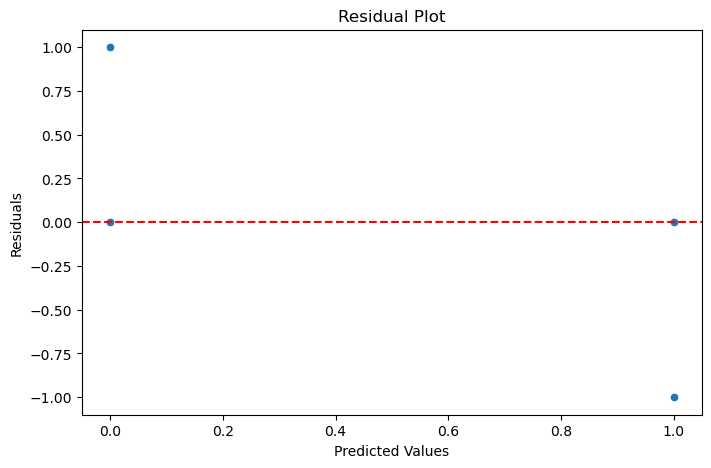

In [113]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predict, y=residual)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [115]:
df['hours-per-week'].sum()

1233731

In [117]:
x.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

<Axes: >

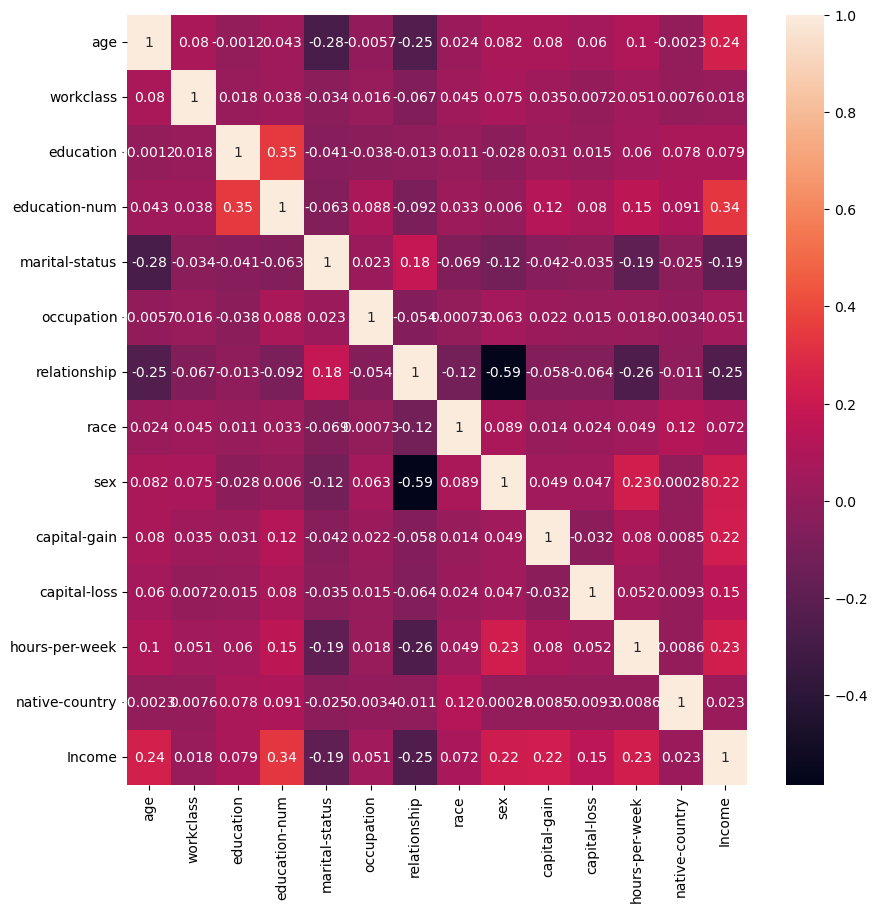

In [119]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [120]:
df[['education','education-num']]

,education,education-num
0,9,13
1,9,13
2,11,9
3,1,7
4,9,13
...,...,...
32556,7,12
32557,11,9
32558,11,9
32559,11,9


## Decision Tree

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [128]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [130]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [132]:
y_predict = model.predict(x_test)

In [134]:
y_predict

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [136]:
from sklearn.metrics import accuracy_score

In [138]:
accuracy_score(y_test,y_predict)

0.811022752374641

In [140]:
joblib.dump(model,'Decision_tree.pkl')

['Decision_tree.pkl']